In [1]:
import pandas as pd
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genus_list = [
    "Bifidobacterium",
    "Blautia",
    "f_Lachnospiraceae;g_UA",
    "Monoglobus",
    "Hungatella",
    "Flavonifractor",
    "Lachnoclostridium",
    "Parabacteroides",
]

In [3]:
x_features = genus_list
y_features = ["Valine lysine dipeptide", "Arabinose", "Galactose"]

In [4]:
df_key = pd.read_excel('./data/Key_metabolites.xlsx', sheet_name='key_dataset')

corr_matrix = pd.DataFrame(index=x_features, columns=y_features)
pval_matrix = pd.DataFrame(index=x_features, columns=y_features)


In [5]:
for x in x_features:
    for y in y_features:
        corr, pval = spearmanr(df_key[x], df_key[y])
        corr_matrix.loc[x, y] = corr
        pval_matrix.loc[x, y] = pval

# Convert to float
corr_matrix = corr_matrix.astype(float)
pval_matrix = pval_matrix.astype(float)


In [6]:
corr_matrix

,Valine lysine dipeptide,Arabinose,Galactose
Bifidobacterium,0.308948,0.199817,0.006917
Blautia,0.433572,0.298081,0.241626
f_Lachnospiraceae;g_UA,0.402407,0.361790,0.237683
Monoglobus,0.282733,0.547636,0.556975
Hungatella,-0.271760,-0.136344,-0.153967
Flavonifractor,-0.559534,-0.299480,-0.150877
Lachnoclostridium,-0.245462,-0.419709,-0.348495
Parabacteroides,-0.229496,-0.366441,-0.240783


In [7]:
pval_matrix

,Valine lysine dipeptide,Arabinose,Galactose
Bifidobacterium,0.185040,0.398313,0.976912
Blautia,0.056156,0.201786,0.304743
f_Lachnospiraceae;g_UA,0.078580,0.117013,0.312943
Monoglobus,0.227109,0.012439,0.010741
Hungatella,0.246427,0.566526,0.516916
Flavonifractor,0.010311,0.199576,0.525462
Lachnoclostridium,0.296892,0.065435,0.132110
Parabacteroides,0.330391,0.112036,0.306486


In [8]:
significant_mask = pval_matrix < 0.05
significant_corrs = corr_matrix.where(significant_mask).dropna(how='all').dropna(axis=1, how='all')

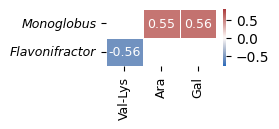

In [9]:
plt.figure(figsize=(2.8, 1.4))

# Draw the heatmap for significant correlations
sns.heatmap(significant_corrs, annot=True, cmap='vlag', center=0, fmt=".2f",
             linewidths=0.5, annot_kws = {'size' : 9}, vmax=0.8, vmin=-0.8)

# plt.title("Significant Spearman Correlation Heatmap (FDR < 0.05)")
plt.xticks([0.5, 1.5, 2.5], ['Val-Lys', 'Ara', 'Gal'], rotation=90, ha='center', fontsize=9)
plt.yticks(rotation=0, fontsize=9, fontstyle='italic')
plt.tight_layout()
# plt.savefig('spearman_hydrolysis.png', dpi=600)
plt.show()

In [23]:
# The SCFA intensities were normalized by setting the mean value of the control group to 1, allowing for relative comparison across groups.

df = pd.read_excel('./data/Key_metabolites.xlsx', sheet_name='key_dataset_rel')


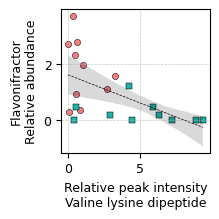

In [30]:
# 지정한 색상 순서로 마커 스타일과 함께 그룹 시각화
g_colors = ['lightcoral','lightseagreen',]
group_order = ["Control", "Chickpea"]
marker_dict = {
    "Control": "o",
    "Chickpea": "s",
}

plt.figure(figsize=(2.4, 2.3))
for group, color in zip(group_order, g_colors):
    subset = df[df["class"] == group]
    sns.scatterplot(
        data=subset,
        x="Valine lysine dipeptide",
        y="Flavonifractor",
        label=group,
        color=color,
        marker=marker_dict[group],
        s=20,
        edgecolor="black"
    )

sns.regplot(
data=df,
x="Valine lysine dipeptide",
y="Flavonifractor",
scatter=False,
color="black",
line_kws={"linewidth": 0.5, "label": "Overall trend", "linestyle": "--"}
)

# plt.title("Bifidobacterium vs Acetic acid by Group")
plt.xlabel("Relative peak intensity\nValine lysine dipeptide", fontsize=9)
plt.ylabel("Flavonifractor\nRelative abundance",  fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.legend(title="Group", fontsize=9).remove()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # grid 추가


plt.tight_layout()
plt.savefig('corrleation_F_P.png', dpi=600)

plt.show()


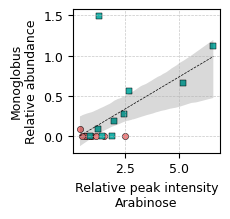

In [31]:
# 지정한 색상 순서로 마커 스타일과 함께 그룹 시각화
g_colors = ['lightcoral','lightseagreen',]
group_order = ["Control", "Chickpea"]
marker_dict = {
    "Control": "o",
    "Chickpea": "s",
}

plt.figure(figsize=(2.4, 2.3))
for group, color in zip(group_order, g_colors):
    subset = df[df["class"] == group]
    sns.scatterplot(
        data=subset,
        x="Arabinose",
        y="Monoglobus",
        label=group,
        color=color,
        marker=marker_dict[group],
        s=20,
        edgecolor="black"
    )

sns.regplot(
data=df,
x="Arabinose",
y="Monoglobus",
scatter=False,
color="black",
line_kws={"linewidth": 0.5, "label": "Overall trend", "linestyle": "--"}
)

# plt.title("Bifidobacterium vs Acetic acid by Group")
plt.xlabel("Relative peak intensity\nArabinose", fontsize=9)
plt.ylabel("Monoglobus\nRelative abundance",  fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.legend(title="Group", fontsize=9).remove()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # grid 추가


plt.tight_layout()
plt.savefig('corrleation_M_A.png', dpi=600)

plt.show()


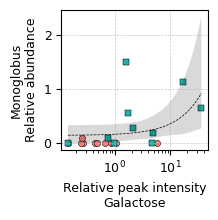

In [32]:
# 지정한 색상 순서로 마커 스타일과 함께 그룹 시각화
g_colors = ['lightcoral','lightseagreen',]
group_order = ["Control", "Chickpea"]
marker_dict = {
    "Control": "o",
    "Chickpea": "s",
}

plt.figure(figsize=(2.4, 2.3))
for group, color in zip(group_order, g_colors):
    subset = df[df["class"] == group]
    sns.scatterplot(
        data=subset,
        x="Galactose",
        y="Monoglobus",
        label=group,
        color=color,
        marker=marker_dict[group],
        s=20,
        edgecolor="black"
    )

sns.regplot(
data=df,
x="Galactose",
y="Monoglobus",
scatter=False,
color="black",
line_kws={"linewidth": 0.5, "label": "Overall trend", "linestyle": "--"}
)

# plt.title("Bifidobacterium vs Acetic acid by Group")
plt.xlabel("Relative peak intensity\nGalactose", fontsize=9)
plt.ylabel("Monoglobus\nRelative abundance",  fontsize=9)
plt.xticks(fontsize=9)
plt.xscale('log') 
plt.yticks(fontsize=9)

plt.legend(title="Group", fontsize=9).remove()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # grid 추가
# plt.xlim(0, 6)

plt.tight_layout()
plt.savefig('corrleation_M_G.png', dpi=600)

plt.show()
